In [1]:
# SIR communities starting from different number of infected people
import numpy as np

L_1 = 2; L_2 = 2
w_1 = [0.5,0.5]; w_2 = [0.5, 0.5] #It does not matter whether we choose a 50-50 or a 60-40 repartition of the society.
A_1 = [[6,2],
       [2,1]]
A_2 = [[6, 2], 
       [2, 1]]
# 0-végtelen , gyakorlatilag 100-szoros szorzónál nem érdemes többre beállítani, reálisan 0-100 között mozog
# magyar lakosságot 9 közösségre osztották
# 2 szeres szorzó nem igazán számít, 10-szeres már igen
max_i = 1
# time and steps to fill the t long list with zero values
T=10
dt=0.001
nsteps=round(T/dt)
v_S_1=[[0,0] for t in range(nsteps+1)]; v_S_2=[[0,0] for t in range(nsteps+1)]
v_I_1=[[0,0] for t in range(nsteps+1)]; v_I_2=[[0,0] for t in range(nsteps+1)]
v_R_1=[[0,0] for t in range(nsteps+1)]; v_R_2=[[0,0] for t in range(nsteps+1)]


# initial condition
#Starting from a lower number of infected people, the epidemic will flow the same way, it will only start in a slower way.
v_I_1[0]=[0.0001,0]; v_I_2[0]=[0.0000001,0]
v_S_1[0]=[0.9999,1]; v_S_2[0]=[0.9999999,1] #The values (the one above and the other which is under it) must add up to 1 

# model parameters
beta=3
gamma=1

# SIR for communities, differential equations
for t in range(nsteps):
    for l in  range(L_1): 
         v_S_1[t+1][l]=v_S_1[t][l]-dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))
         v_I_1[t+1][l]=v_I_1[t][l]+dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))-gamma*v_I_1[t][l]*dt 
         v_R_1[t+1][l]=v_R_1[t][l]+gamma*v_I_1[t][l]*dt
         
for t in range(nsteps):
    for l in range(L_2):
         v_S_2[t+1][l]=v_S_2[t][l]-dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))
         v_I_2[t+1][l]=v_I_2[t][l]+dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))-gamma*v_I_2[t][l]*dt
         v_R_2[t+1][l]=v_R_2[t][l]+gamma*v_I_2[t][l]*dt

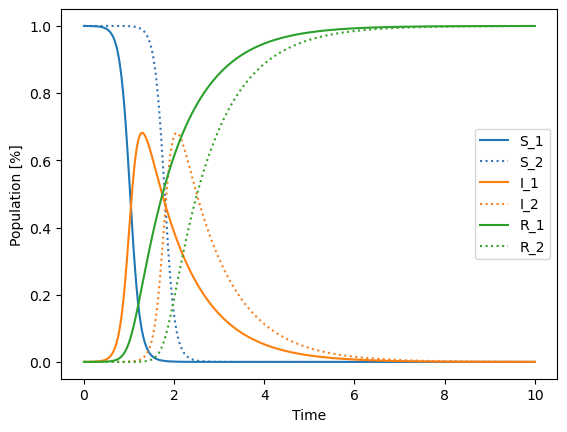

In [2]:
v_S_a_0=[v_S_1[t][0] for t in range(nsteps+1)]; v_S_b_0=[v_S_2[t][0] for t in range(nsteps+1)]
v_I_a_0=[v_I_1[t][0] for t in range(nsteps+1)]; v_I_b_0=[v_I_2[t][0] for t in range(nsteps+1)]
v_R_a_0=[v_R_1[t][0] for t in range(nsteps+1)]; v_R_b_0=[v_R_2[t][0] for t in range(nsteps+1)]
import matplotlib.pyplot as plt
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]

plt.figure()
plt.plot(trange,v_S_a_0,label='S_1'); plt.plot(trange,v_S_b_0,linestyle="dotted",color="#3575b4",label='S_2')
plt.plot(trange,v_I_a_0,label='I_1'); plt.plot(trange,v_I_b_0,linestyle="dotted",color="#f78020",label='I_2')
plt.plot(trange,v_R_a_0,label='R_1'); plt.plot(trange,v_R_b_0,linestyle="dotted",color="#38a32a",label='R_2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('currentDiagrams/04_SIR_communities_compare_different_beginning_value.png', bbox_inches='tight') #Saving the figure



In [3]:
#Counting the maximum values of the epidemices to get a shifting value
max_i_a = 0
max = 0
t = 0
for n in v_I_a_0:
    t += (10/(nsteps+1))
    if n > max:
        max = n
        max_a_i = t
t = 0
max = 0
max_b_i = 0
for n in v_I_b_0:
    t += (10/(nsteps+1))
    if n > max:
        max = n
        max_b_i= t
    
maxdif = max_b_i - max_a_i;


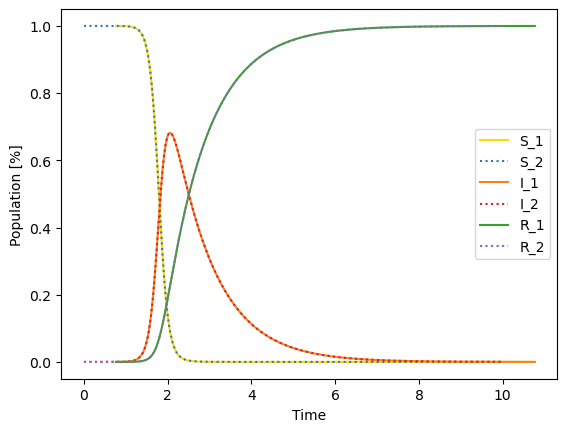

In [4]:
#SIR communities diagram shifted

# SIR for communities
for t in range(nsteps):
    for l in range(L_1): 
         v_S_1[t+1][l]=v_S_1[t][l]-dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))
         v_I_1[t+1][l]=v_I_1[t][l]+dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))-gamma*v_I_1[t][l]*dt 
         v_R_1[t+1][l]=v_R_1[t][l]+gamma*v_I_1[t][l]*dt
for t in range(nsteps):
    for l in range(L_2):
         v_S_2[t+1][l]=v_S_2[t][l]-dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))
         v_I_2[t+1][l]=v_I_2[t][l]+dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))-gamma*v_I_2[t][l]*dt
         v_R_2[t+1][l]=v_R_2[t][l]+gamma*v_I_2[t][l]*dt
        
v_S_a_0=[v_S_1[t][0] for t in range(nsteps+1)]; v_S_b_0=[v_S_2[t][0] for t in range(nsteps+1)]
v_I_a_0=[v_I_1[t][0] for t in range(nsteps+1)]; v_I_b_0=[v_I_2[t][0] for t in range(nsteps+1)]
v_R_a_0=[v_R_1[t][0] for t in range(nsteps+1)]; v_R_b_0=[v_R_2[t][0] for t in range(nsteps+1)]


trange=[(t)*dt for t in range(nsteps+1)]
trange2 = [x+maxdif for x in trange]

plt.figure()
plt.plot(trange2,v_S_a_0,color="#ffda03",label='S_1'); plt.plot(trange,v_S_b_0,linestyle='dotted',color="#3575b4",label='S_2')
plt.plot(trange2,v_I_a_0,color="#f78020",label='I_1'); plt.plot(trange,v_I_b_0,linestyle='dotted',color="#cf222f",label='I_2')
plt.plot(trange2,v_R_a_0,color="#38a32a",label='R_1'); plt.plot(trange,v_R_b_0,linestyle='dotted',color="#9462bd",label='R_2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('currentDiagrams/04_shifted_SIR_communities_shifted_compare_different_beginning_value.png', bbox_inches='tight') #Ábra mentése

In [5]:
#2. when we have the same, very very small beginning value, but first, we start it from the one and then from the other community
L_1 = 2; L_2 = 2
w_1 = [0.5,0.5]; w_2 = [0.5, 0.5] #It does not matter whether we choose a 50-50 or a 60-40 repartition of the society.
A_1 = [[0.5,1],
       [1,6]]
A_2 = [[6, 1], 
       [1, 0.5]]
# 0-végtelen , gyakorlatilag 100-szoros szorzónál nem érdemes többre beállítani, reálisan 0-100 között mozog
# magyar lakosságot 9 közösségre osztották
# 2 szeres szorzó nem igazán számít, 10-szeres már igen
max_i = 1
# time and steps to fill the t long list with zero values
T=10
dt=0.001
nsteps=round(T/dt)
v_S_1=[[0,0] for t in range(nsteps+1)]; v_S_2=[[0,0] for t in range(nsteps+1)]
v_I_1=[[0,0] for t in range(nsteps+1)]; v_I_2=[[0,0] for t in range(nsteps+1)]
v_R_1=[[0,0] for t in range(nsteps+1)]; v_R_2=[[0,0] for t in range(nsteps+1)]


# initial condition
#Starting from a lower number of infected people, the epidemic will flow the same way, it will only start in a slower way.
v_I_1[0]=[0.0000001,0]; v_I_2[0]=[0.0000001,0]
v_S_1[0]=[0.9999999,1]; v_S_2[0]=[0.9999999,1] #The values (the one above and the other which is under it) must add up to 1 

# model parameters
beta=3
gamma=1

# SIR for communities, differential equations
for t in range(nsteps):
    for l in  range(L_1): 
         v_S_1[t+1][l]=v_S_1[t][l]-dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))
         v_I_1[t+1][l]=v_I_1[t][l]+dt*beta*v_S_1[t][l]*sum(A_1[k][l]*w_1[k]*v_I_1[t][k] for k in range(L_1))-gamma*v_I_1[t][l]*dt 
         v_R_1[t+1][l]=v_R_1[t][l]+gamma*v_I_1[t][l]*dt
         
for t in range(nsteps):
    for l in range(L_2):
         v_S_2[t+1][l]=v_S_2[t][l]-dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))
         v_I_2[t+1][l]=v_I_2[t][l]+dt*beta*v_S_2[t][l]*sum(A_2[k][l]*w_2[k]*v_I_2[t][k] for k in range(L_2))-gamma*v_I_2[t][l]*dt
         v_R_2[t+1][l]=v_R_2[t][l]+gamma*v_I_2[t][l]*dt

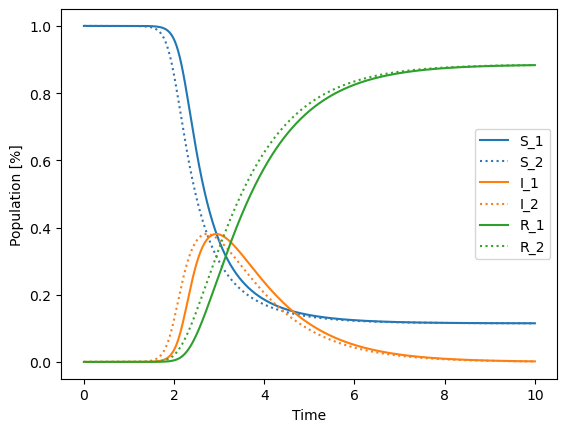

In [6]:
v_S_a_0=[v_S_1[t][0] for t in range(nsteps+1)]; v_S_b_0=[v_S_2[t][1] for t in range(nsteps+1)]
v_I_a_0=[v_I_1[t][0] for t in range(nsteps+1)]; v_I_b_0=[v_I_2[t][1] for t in range(nsteps+1)]
v_R_a_0=[v_R_1[t][0] for t in range(nsteps+1)]; v_R_b_0=[v_R_2[t][1] for t in range(nsteps+1)]
import matplotlib.pyplot as plt
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]

plt.figure()
plt.plot(trange,v_S_a_0,label='S_1'); plt.plot(trange,v_S_b_0,linestyle="dotted",color="#3575b4",label='S_2')
plt.plot(trange,v_I_a_0,label='I_1'); plt.plot(trange,v_I_b_0,linestyle="dotted",color="#f78020",label='I_2')
plt.plot(trange,v_R_a_0,label='R_1'); plt.plot(trange,v_R_b_0,linestyle="dotted",color="#38a32a",label='R_2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('currentDiagrams/13_SIR_communities_compare_different_starting_community.png', bbox_inches='tight') #Saving the figure



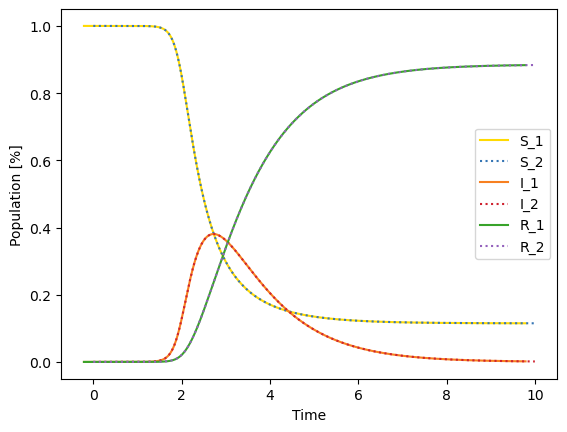

In [7]:
#Counting the maximum values of the epidemices to get a shifting value
max_i_a = 0
max = 0
t = 0
for n in v_I_a_0:
    t += (10/(nsteps+1))
    if n > max:
        max = n
        max_a_i = t
t = 0
max = 0
max_b_i = 0
for n in v_I_b_0:
    t += (10/(nsteps+1))
    if n > max:
        max = n
        max_b_i= t
    
maxdif = max_b_i - max_a_i;


trange=[(t)*dt for t in range(nsteps+1)]
trange2 = [x+maxdif for x in trange]

plt.figure()
plt.plot(trange2,v_S_a_0,color="#ffda03",label='S_1'); plt.plot(trange,v_S_b_0,linestyle='dotted',color="#3575b4",label='S_2')
plt.plot(trange2,v_I_a_0,color="#f78020",label='I_1'); plt.plot(trange,v_I_b_0,linestyle='dotted',color="#cf222f",label='I_2')
plt.plot(trange2,v_R_a_0,color="#38a32a",label='R_1'); plt.plot(trange,v_R_b_0,linestyle='dotted',color="#9462bd",label='R_2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('currentDiagrams/13_shifted_SIR_communities_shifted_compare_different_startingCommunity.png', bbox_inches='tight') #Ábra mentése